In [14]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn import tree
import pandas as pd
import graphviz
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Speech Act to Numbers
def speech_act_to_float(string):
    if string in acts:
        return acts[string]
    elif len(acts.keys()) == 0:
        acts[string] = 0
        return acts[string]
    else:
        acts[string] = max(acts.values()) + 1
        return acts[string]


# Speech Act to Numbers
def consistency_to_float(string):
    if string in cons:
        return cons[string]
    elif len(cons.keys()) == 0:
        cons[string] = 0
        return cons[string]
    else:
        cons[string] = max(cons.values()) + 1
        return cons[string]


def utterance_type_to_float(string):
    if string in uts:
        return uts[string]
    elif len(uts.keys()) == 0:
        uts[string] = 0
        return uts[string]
    else:
        uts[string] = max(uts.values()) + 1
        return uts[string]


def syn_level_to_float(string):
    if string in syns:
        return syns[string]
    elif len(syns.keys()) == 0:
        syns[string] = 0
        return syns[string]
    else:
        syns[string] = max(syns.values()) + 1
        return syns[string]


def connective_meaning_to_float(string):
    if string in cons:
        return cons[string]
    elif len(cons.keys()) == 0:
        cons[string] = 0
        return cons[string]
    else:
        cons[string] = max(cons.values()) + 1
        return cons[string]


def annotation_to_float(string):
    if string in anns:
        return anns[string]
    elif len(anns.keys()) == 0:
        anns[string] = 0
        return anns[string]
    else:
        anns[string] = max(anns.values()) + 1
        return anns[string]

In [3]:
# IMPORT DATA
all_data = pd.read_csv("providence_merged.csv")
data = all_data[['speech_act','consistency', 'utterance_type','intonation','syn_level','connective_meaning','annotation']]

# CONVERT DATA TEXT TO INT
acts = {}
data['speech_act'] = data['speech_act'].apply(speech_act_to_float)
cons = {}
data['consistency'] = data['consistency'].apply(consistency_to_float)
uts = {}
data['utterance_type'] = data['utterance_type'].apply(utterance_type_to_float)
syns = {}
data['syn_level'] = data['syn_level'].apply(syn_level_to_float)
cons = {}
data['connective_meaning'] = data['connective_meaning'].apply(connective_meaning_to_float)
anns = {}
data['annotation'] = data['annotation'].apply(annotation_to_float)

# Select input and target
X = data[['consistency', 'intonation','annotation','speech_act']]
y = np.squeeze(data[['connective_meaning']])

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [8]:
trains = range(1,301)
scores = []
for t in trains:
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=t)
    clf = rfc(n_estimators=10,max_depth=8,max_features=None,random_state=0)
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))

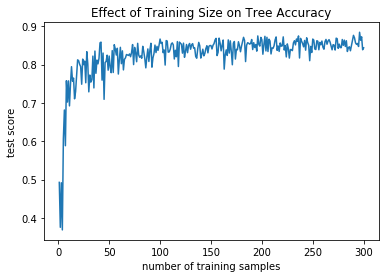

In [9]:
plt.plot(trains,scores)
plt.xlabel('number of training samples')
plt.ylabel('test score')
plt.title('Effect of Training Size on Tree Accuracy')
plt.show()

0.858990944373


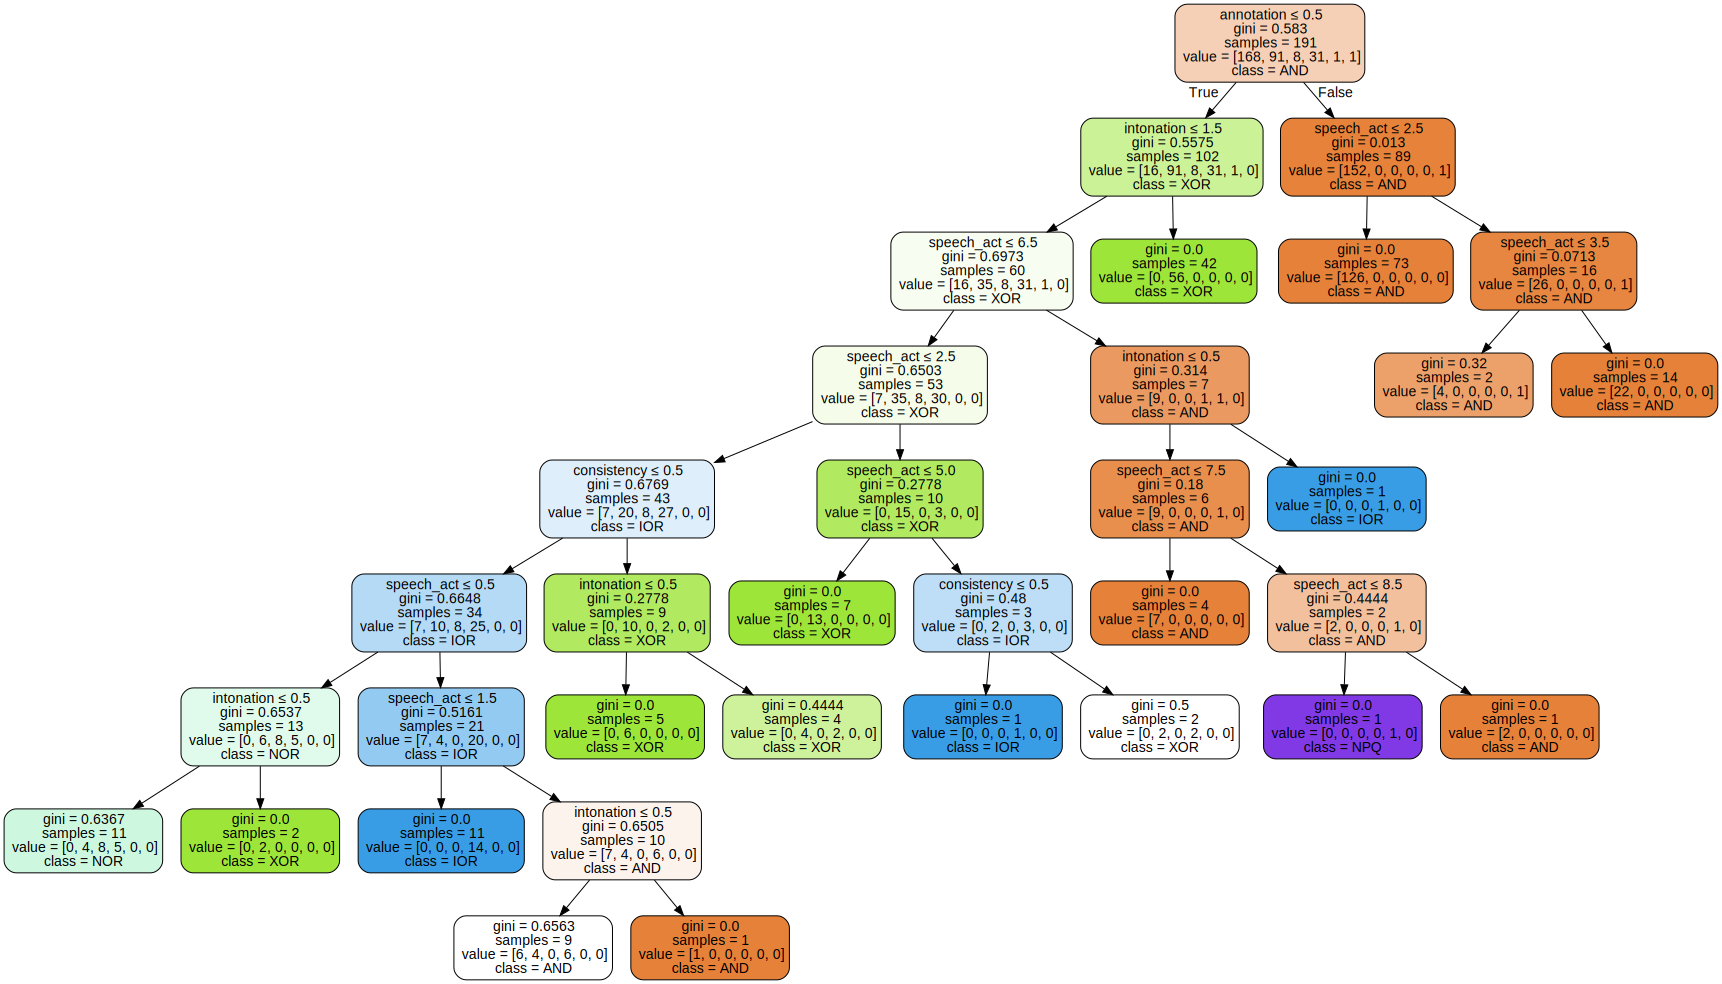

In [18]:
max_tree = clf.estimators_[0]
for estimator in clf.estimators_:
    if estimator.score(X_test,y_test) > max_tree.score(X_test,y_test):
        max_tree = estimator
print max_tree.score(X_test,y_test)
dot_data = tree.export_graphviz(max_tree, out_file=None,
                                    feature_names=['consistency','intonation','annotation','speech_act'],
                                    class_names=['AND', 'XOR', 'NOR', 'IOR', 'NPQ', 'XNOR'],
                                    filled=True, rounded=True,
                                    special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('plots/ensemble_tree')
graph